In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars1.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model             0
origin            0
car               0
Unnamed: 9      198
Unnamed: 10     198
Unnamed: 11     198
Unnamed: 12     198
Unnamed: 13     198
dtype: int64

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [7]:
df.car.value_counts()

ford maverick               5
ford pinto                  5
amc matador                 5
amc gremlin                 4
chevrolet impala            4
                           ..
maxda rx3                   1
toyota corolla 1600 (sw)    1
audi 100 ls                 1
plymouth cricket            1
dodge d200                  1
Name: car, Length: 144, dtype: int64

In [8]:
df.cylinders.unique()

array([8, 4, 6, 3], dtype=int64)

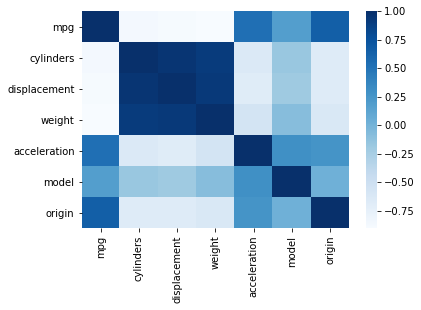

In [9]:
sns.heatmap(df.corr(), cmap='Blues')

In [10]:
df.origin.value_counts()

1    136
2     37
3     25
Name: origin, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

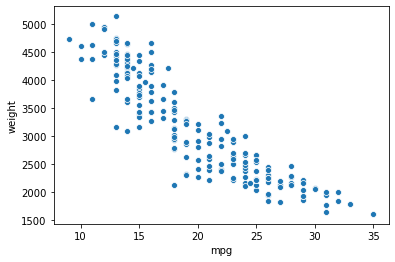

In [12]:
sns.scatterplot(df['mpg'],df['weight'])

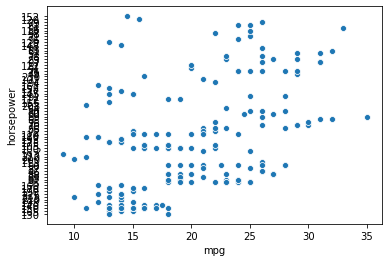

In [13]:
sns.scatterplot(df['mpg'],df['horsepower'])

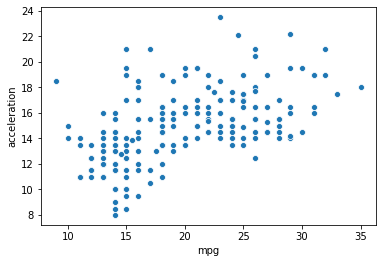

In [14]:
sns.scatterplot(df['mpg'],df['acceleration'])

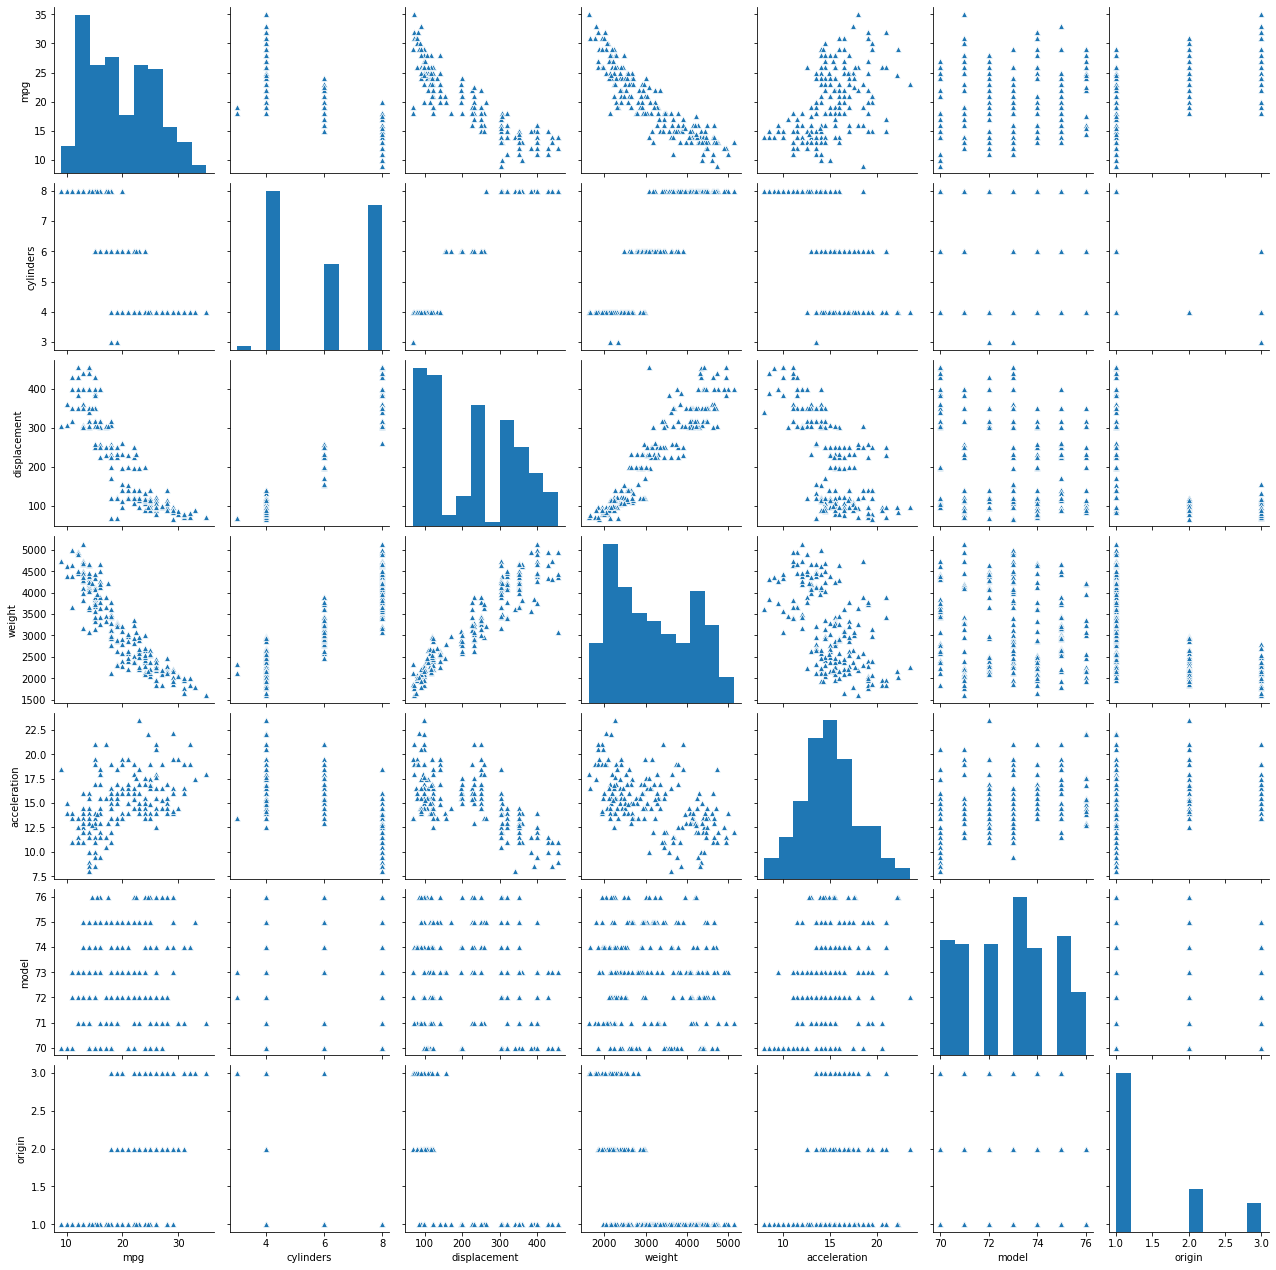

In [15]:
sns.pairplot(df, markers='^',kind='scatter')

In [16]:
'cylinders, model and origin are categorical'

'cylinders, model and origin are categorical'

In [17]:
from sklearn.preprocessing import OneHotEncoder

df['origin']=df['origin'].astype('category')
df['cylinders']=df['cylinders'].astype('category')
df['model']=df['model'].astype('category')
  
df['origin'] = df['origin'].cat.codes
df['cylinders'] = df['cylinders'].cat.codes
df['model'] = df['model'].cat.codes
  
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['origin','cylinders','model']]).toarray())
data=df.join(enc_data)
  
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          3           307        130    3504          12.0      0   
1  15.0          3           350        165    3693          11.5      0   
2  18.0          3           318        150    3436          11.0      0   
3  16.0          3           304        150    3433          12.0      0   
4  17.0          3           302        140    3449          10.5      0   

   origin                        car    0  ...    4    5    6    7    8    9  \
0       0  chevrolet chevelle malibu  1.0  ...  0.0  0.0  1.0  1.0  0.0  0.0   
1       0          buick skylark 320  1.0  ...  0.0  0.0  1.0  1.0  0.0  0.0   
2       0         plymouth satellite  1.0  ...  0.0  0.0  1.0  1.0  0.0  0.0   
3       0              amc rebel sst  1.0  ...  0.0  0.0  1.0  1.0  0.0  0.0   
4       0                ford torino  1.0  ...  0.0  0.0  1.0  1.0  0.0  0.0   

    10   11   12   13  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0

In [18]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,0,...,4,5,6,7,8,9,10,11,12,13
0,18.0,3,307,130,3504,12.0,0,0,chevrolet chevelle malibu,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,3,350,165,3693,11.5,0,0,buick skylark 320,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,3,318,150,3436,11.0,0,0,plymouth satellite,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,3,304,150,3433,12.0,0,0,amc rebel sst,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,3,302,140,3449,10.5,0,0,ford torino,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data.drop(['model','origin','car','cylinders','horsepower'], axis=1, inplace=True) 

In [20]:
data.head()

,mpg,displacement,weight,acceleration,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.0,307,3504,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,350,3693,11.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,318,3436,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,304,3433,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,302,3449,10.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#sns.pairplot(data)

In [22]:
y = data['mpg'].values
x = data.drop(['mpg'], axis=1).values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=20)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
score_train = regressor.score(x_train, y_train)
score_test = regressor.score(x_test, y_test)

print('R^2 score for training data = %10.4f'%(score_train))
print('R^2 score for testing data  = %10.4f'%(score_test))
print()

R^2 score for training data =     0.9038
R^2 score for testing data  =     0.8704



##### LassoLars Regression

In [26]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit(x_train, y_train)

LassoLars(alpha=0.1, normalize=False)

In [27]:
score_train_2 = regressor.score(x_train, y_train)
score_test_2 = regressor.score(x_test, y_test)
print('R^2 score for training data = %10.4f'%(score_train_2))
print('R^2 score for testing data  = %10.4f'%(score_test_2))
print()

R^2 score for training data =     0.9038
R^2 score for testing data  =     0.8704



In [29]:
reg.coef_

array([-0.01287893, -0.00351983, -0.0434017 , -0.37160826,  0.        ,
        0.12152359,  0.        ,  1.16694602, -0.11141365,  0.        ,
        0.        ,  0.        , -0.74912697, -0.5381762 ,  0.        ,
        0.        ,  0.52817203])

#### Bayesian Ridge Regression

In [31]:
reg1 = linear_model.LassoLars(alpha=.1, normalize=False)
reg1.fit(x_train, y_train)
print(reg1.score(x_train, y_train))
print(reg1.score(x_test, y_test))

0.8762518888713273
0.814911784060615


##### Polynomial regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x_train, y_train)


In [40]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9683254170758079
0.8070997560969561


### Logistic regression

In [42]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,3,307,130,3504,12.0,0,0,chevrolet chevelle malibu
1,15.0,3,350,165,3693,11.5,0,0,buick skylark 320
2,18.0,3,318,150,3436,11.0,0,0,plymouth satellite
3,16.0,3,304,150,3433,12.0,0,0,amc rebel sst
4,17.0,3,302,140,3449,10.5,0,0,ford torino


In [53]:
y = df['cylinders'].values
x = df.drop(['horsepower', 'car','model','origin','cylinders'], axis=1).values

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=20)

In [55]:
clf = LogisticRegression(random_state=0).fit(x_train,y_train)

C:\Users\Ishani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
clf.score(x_train,y_train)

1.0

In [57]:
score_train_2 = clf.score(x_train, y_train)
score_test_2 = clf.score(x_test, y_test)
print('R^2 score for training data = %10.4f'%(score_train_2))
print('R^2 score for testing data  = %10.4f'%(score_test_2))
print()

R^2 score for training data =     1.0000
R^2 score for testing data  =     0.9750



#### Prediction from Logistic regression

In [59]:
predict1 = clf.predict([[18,350,3045,12]])

In [65]:
print('For mgp = 18, displacement = 350,weight = 3045, acceleration = 12, predicted number of cylinders from SKlearn is/are',int(predict1))
print()


For mgp = 18, displacement = 350,weight = 3045, acceleration = 12, predicted number of cylinders from SKlearn is/are 3

